In [312]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
df.shape

(45211, 11)

In [4]:
df.info()  #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [5]:
df.isnull().sum()  #check for null values

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [6]:
df.describe()  #calculate statistical data on numerical column

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

### Outlier detection using IQR approach

In [8]:
a=['age', 'day', 'dur', 'num_calls']
for i in a:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)
    print("{} lower threshold :{} and upper threshold :{}".format(i,lower_threshold, upper_threshold))

age lower threshold :10.5 and upper threshold :70.5
day lower threshold :-11.5 and upper threshold :40.5
dur lower threshold :-221.0 and upper threshold :643.0
num_calls lower threshold :-2.0 and upper threshold :6.0


### Conclusion :

- 'age' which is Age of potential customer whose values lies in between 18 and 95 which is reasonable by our knowledge. 
- maximum value of 'day' is 31 and minimum is 1 which is true by our knowledge but we have to analyze again since some month have maximum values 28 or 30 . 
- 'dur' which have values which exceedes upper threshold, so we need to handle it.
- 'num_calls' have values which exceedes upper threshold, so we need to handle it.
- conclusion: outlier detected in 'dur' and 'num_calls'

### Clipping the outlier

In [9]:
a=['dur', 'num_calls']
for i in a:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)
    df[i]=df[i].clip(lower_threshold, upper_threshold)

cliping of outlier has been done.`

In [10]:
df.shape  #shape which give number of rows and column

(45211, 11)

In [11]:
df.duplicated().sum()  #number of duplicated rows present

16

In [12]:
df.drop_duplicates(inplace=True)  #delete the duplicates

In [13]:
df.shape  #check the shape after removing duplicates

(45195, 11)

In [14]:
df['job'].value_counts()   #count number of people in each 'job' type

blue-collar      9728
management       9455
technician       7593
admin.           5170
services         4152
retired          2263
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           937
unknown           288
Name: job, dtype: int64

In [15]:
df['job'].replace('admin.','admin',inplace=True)  #admin contains '.',remove it.

In [16]:
df['job'].value_counts()

blue-collar      9728
management       9455
technician       7593
admin            5170
services         4152
retired          2263
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           937
unknown           288
Name: job, dtype: int64

In [17]:
(df[df['job']=='unknown'].shape[0]/df.shape[0])*100

0.6372386325921009

- we don't know job of 0.5% people

In [18]:
df['marital'].unique() #finding unique marital status

array(['married', 'single', 'divorced'], dtype=object)

In [19]:
df['marital'].value_counts()  #count number of people in each marital status 

married     27204
single      12784
divorced     5207
Name: marital, dtype: int64

In [20]:
df['education_qual'].unique() #finding unique education qualification

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [21]:
df['education_qual'].value_counts()  #count number of people in each unique education qualification category

secondary    23192
tertiary     13296
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [22]:
(df[df['education_qual']=='unknown'].shape[0]/df.shape[0])*100

4.108861599734484

-  We don't know education qualification of 1857 people which is just over 4%

In [23]:
df['call_type'].unique()  #finding unique call_type

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [24]:
df['call_type'].value_counts()  #count number of calls in each call type

cellular     29277
unknown      13012
telephone     2906
Name: call_type, dtype: int64

In [25]:
(df[df['call_type']=='unknown'].shape[0]/df.shape[0])*100

28.79079544197367

-  We don't know call type of 2906 calls which is 28.8%

In [26]:
df['day'].min(),df['day'].max()  

(1, 31)

In [27]:
df['day'].unique().size

31

In [28]:
df['mon'].unique(),df['mon'].unique().size  #check unique values of month

(array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
        'mar', 'apr', 'sep'], dtype=object),
 12)

In [29]:
print('feb' in df.loc[df['day']==30,'mon'].unique()) #check whether 'february' month has 30 days
df.loc[df['day']==31,'mon'].unique()  #check is there some months which should have 'day 30' contain 'day 31'

False


array(['jul', 'oct', 'mar', 'aug', 'dec', 'may'], dtype=object)

In [30]:
df['prev_outcome'].unique()  #finding unique previous outcome

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [31]:
df['prev_outcome'].value_counts()

unknown    36943
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [32]:
(df[df['prev_outcome']=='unknown'].shape[0]/df.shape[0])*100

81.74134306892356

- we don't know previous outcome of 36953 people which is 81.7%

In [33]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [34]:
df['y'].value_counts()

no     39908
yes     5287
Name: y, dtype: int64

In [35]:
(df[df['y']=='yes'].shape[0]/df.shape[0])*100

11.69819670317513

- It is highly imbalanced data . Only 11% people signed up for the insurance

### Data Engineering of unknown 'job' values

In [36]:
df=df.loc[~((df['job']=='unknown')&(df['education_qual']=='unknown')&(df['call_type']=='unknown')&(df['prev_outcome']=='unknown')&(df['y']=='no'))]
df.shape

(45142, 11)

In [37]:
df['job'].value_counts()

blue-collar      9728
management       9455
technician       7593
admin            5170
services         4152
retired          2263
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           937
unknown           235
Name: job, dtype: int64

In [38]:
df.loc[((df['job']=='unknown')&(df['y']=='no'))].shape  #people whose job is unknown and not choosing insurance we deleting those rows.

(201, 11)

In [39]:
df=df.loc[~((df['job']=='unknown')&(df['y']=='no'))]   #drop rows where job is unknown and not choosing insurance
df.shape

(44941, 11)

In [40]:
df['job'].value_counts()

blue-collar      9728
management       9455
technician       7593
admin            5170
services         4152
retired          2263
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           937
unknown            34
Name: job, dtype: int64

In [41]:
df.loc[(df['job']=='unknown')][df['age']>30].shape  #people whose job is unknown are people above 30 age.

C:\Users\scman\AppData\Local\Temp\ipykernel_18264\2194105571.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[(df['job']=='unknown')][df['age']>30].shape  #people whose job is unknown are people above 30 age.


(30, 11)

In [42]:
df.loc[(df['age']>30)&(df['marital']=="married")&(df['education_qual']=='tertiary')]['job'].value_counts()  #here majority people are job as management

management       4024
technician        814
entrepreneur      428
self-employed     407
retired           254
admin             205
unemployed        116
housemaid         108
services           78
blue-collar        54
student             8
unknown             1
Name: job, dtype: int64

In [43]:
df.loc[(df['age']>30)&(df['marital']=="married")&(df['education_qual']=='tertiary')&(df['job']=='unknown'),'job']='management'

In [44]:
df.loc[(df['age']>30)&(df['marital']=="married")&(df['education_qual']=='primary')]['job'].value_counts() #majority are blue collar

blue-collar      2727
retired           602
housemaid         483
management        246
services          216
unemployed        155
entrepreneur      149
admin             142
technician        121
self-employed     110
unknown             3
student             2
Name: job, dtype: int64

In [45]:
df.loc[(df['age']>30)&(df['marital']=="married")&(df['education_qual']=='primary')&(df['job']=='unknown'),'job']='blue-collar'

In [46]:
df['job'].value_counts()

blue-collar      9731
management       9456
technician       7593
admin            5170
services         4152
retired          2263
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           937
unknown            30
Name: job, dtype: int64

In [47]:
df.loc[(df['age']>30)&(df['marital']=="single")&(df['education_qual']=='secondary')&(df['prev_outcome']=='unknown')]['job'].value_counts()

technician       896
admin            658
blue-collar      593
services         453
management       176
unemployed        99
self-employed     64
entrepreneur      43
retired           36
housemaid         35
student           24
unknown            1
Name: job, dtype: int64

In [48]:
df[(df['age']<50)&(df['job']=='unknown')&(df['prev_outcome']=='success')]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
40196,37,unknown,single,tertiary,cellular,8,jun,257.0,2.0,success,yes
41542,38,unknown,single,tertiary,cellular,11,sep,260.0,3.0,success,yes
41985,41,unknown,single,unknown,cellular,27,oct,143.0,1.0,success,yes
42739,42,unknown,single,unknown,cellular,27,jan,245.0,1.0,success,yes
44970,28,unknown,single,unknown,cellular,11,oct,450.0,1.0,success,yes


In [49]:
df[(df['age']<50)&(df['prev_outcome']=='success')]['job'].value_counts()

management       302
technician       195
admin            162
blue-collar      125
student           87
services          71
unemployed        47
self-employed     43
housemaid         16
entrepreneur      12
unknown            5
Name: job, dtype: int64

In [50]:
df.loc[(df['age']<50)&(df['job']=='unknown')&(df['prev_outcome']=='success'),'job']='management'

In [51]:
df[(df['age']>50)&(df['job']=='unknown')&(df['prev_outcome']=='success')]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
42986,54,unknown,married,secondary,cellular,11,feb,449.0,1.0,success,yes
43694,54,unknown,married,secondary,cellular,13,may,260.0,1.0,success,yes
44544,55,unknown,married,secondary,cellular,12,aug,265.0,1.0,success,yes


In [52]:
df.loc[(df['age']>50)&(df['education_qual']=='secondary')&(df['prev_outcome']=='success')]['job'].value_counts() #majority here is retired

retired         69
admin           35
technician      33
unemployed      16
services        11
blue-collar      9
management       7
housemaid        4
entrepreneur     4
unknown          3
Name: job, dtype: int64

In [53]:
df.loc[(df['age']>50)&(df['education_qual']=='secondary')&(df['job']=='unknown')&(df['prev_outcome']=='success'),'job']='retired'

In [54]:
df[df['job']=='unknown']

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
19045,52,unknown,married,unknown,cellular,5,aug,607.0,3.0,unknown,yes
19062,58,unknown,married,unknown,telephone,5,aug,643.0,4.0,unknown,yes
22926,60,unknown,married,unknown,cellular,26,aug,643.0,6.0,unknown,yes
24081,57,unknown,married,unknown,unknown,23,oct,301.0,1.0,unknown,yes
27443,31,unknown,married,secondary,cellular,21,nov,504.0,2.0,failure,yes
27823,34,unknown,single,secondary,cellular,28,jan,643.0,1.0,unknown,yes
27949,28,unknown,single,secondary,cellular,28,jan,643.0,1.0,unknown,yes
30086,33,unknown,married,secondary,cellular,4,feb,643.0,2.0,failure,yes
31163,27,unknown,single,secondary,telephone,26,feb,232.0,1.0,failure,yes
31237,37,unknown,single,tertiary,cellular,3,mar,426.0,1.0,unknown,yes


- we have yet to fill these 22 rows which contain job as unknown

In [55]:
df[(df['age']>56)&(df['marital']=='married')]['job'].value_counts()

retired          1322
management        498
blue-collar       366
technician        258
admin             196
housemaid         187
services          100
entrepreneur       88
self-employed      86
unemployed         74
unknown             7
Name: job, dtype: int64

In [56]:
df.loc[((df['age']>56)&(df['marital']=='married')&(df['job']=='unknown')),'job']='retired'

Till here we could impute unknown values of job by comparing with other rows which have similar values in remaining columns

In [57]:
df['job'].value_counts()

blue-collar      9731
management       9461
technician       7593
admin            5170
services         4152
retired          2273
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           937
unknown            15
Name: job, dtype: int64

In [58]:
df['job']=df['job'].replace("unknown",'blue-collar')  #replace unknown values with MODE value.

### Data Engineering of unknown 'education_qual' values

In [59]:
df['education_qual'].value_counts()

secondary    23130
tertiary     13261
primary       6802
unknown       1748
Name: education_qual, dtype: int64

In [60]:
df=df[~((df['education_qual']=='unknown')&(df['y']=='no'))] #get rid rows who's outcome is no and education quality is unknown.

In [61]:
df['education_qual'].value_counts()

secondary    23130
tertiary     13261
primary       6802
unknown        252
Name: education_qual, dtype: int64

In [62]:
df[(df['education_qual']=='unknown')]['call_type'].value_counts()

cellular     192
telephone     39
unknown       21
Name: call_type, dtype: int64

In [63]:
df[(df['education_qual']=='unknown')&(df['age']>50)]['job'].value_counts()

retired          37
management       23
admin             9
blue-collar       8
housemaid         4
services          3
self-employed     3
entrepreneur      2
technician        2
Name: job, dtype: int64

In [64]:
df[df['job']=='retired']

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
8,58,retired,married,primary,unknown,5,may,50.0,1.0,unknown,no
15,51,retired,married,primary,unknown,5,may,353.0,1.0,unknown,no
18,60,retired,married,primary,unknown,5,may,219.0,1.0,unknown,no
24,40,retired,married,primary,unknown,5,may,181.0,1.0,unknown,no
43,54,retired,married,secondary,unknown,5,may,643.0,1.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45191,75,retired,divorced,tertiary,cellular,16,nov,262.0,1.0,failure,yes
45195,68,retired,married,secondary,cellular,16,nov,212.0,1.0,success,yes
45204,73,retired,married,secondary,cellular,17,nov,300.0,1.0,failure,yes
45207,71,retired,divorced,primary,cellular,17,nov,456.0,2.0,unknown,yes


In [65]:
df[(df['education_qual']=='unknown')&(df['prev_outcome']=='success')]['job'].value_counts()

management       22
technician        8
retired           8
student           7
blue-collar       3
services          3
admin             3
self-employed     1
Name: job, dtype: int64

In [66]:
df[(df['job']=='management')&(df['prev_outcome']=='success')]['education_qual'].value_counts()

tertiary     339
unknown       22
secondary     20
primary        7
Name: education_qual, dtype: int64

In [67]:
df.loc[((df['education_qual']=='unknown')&(df['prev_outcome']=='success')&(df['job']=='management')),'education_qual']='tertiary'

In [68]:
df.loc[(df['education_qual']=='unknown')&(df['age'].between(18,25))]['job'].value_counts() # here majority people are students

student       27
services       2
admin          1
management     1
technician     1
Name: job, dtype: int64

In [69]:
df[(df['job']=='student')&(df['age'].between(18,25))]['education_qual'].value_counts() #majority student' education is secondary

secondary    255
tertiary      49
primary       36
unknown       27
Name: education_qual, dtype: int64

In [70]:
df.loc[((df['age'].between(18,25))&(df['job']=='student')&(df['education_qual']=='unknown')),'education_qual']='secondary'

In [71]:
df['education_qual'].value_counts()

secondary    23157
tertiary     13283
primary       6802
unknown        203
Name: education_qual, dtype: int64

In [72]:
df.loc[(df['education_qual']=='unknown')&(df['age'].between(25,35))]['marital'].value_counts()

single      31
married     10
divorced     3
Name: marital, dtype: int64

In [73]:
df.loc[(df['marital']=='single')&(df['age'].between(25,35))]['education_qual'].value_counts()

secondary    4145
tertiary     3313
primary       372
unknown        31
Name: education_qual, dtype: int64

In [74]:
df.loc[(df['marital']=='divorced')&(df['age'].between(25,35))]['education_qual'].value_counts() #majority education is secondary

secondary    556
tertiary     245
primary       66
unknown        3
Name: education_qual, dtype: int64

In [75]:
df.loc[((df['age'].between(25,35))&(df['marital']=='single')&(df['education_qual']=='unknown')),'education_qual']='secondary'

In [76]:
df.loc[((df['age'].between(25,35))&(df['education_qual']=='unknown')),'education_qual']='secondary'

In [77]:
df[df['education_qual']=='unknown'].shape[0]

159

In [78]:
df.loc[(df['education_qual']=='unknown')&(df['age']>50)]['job'].value_counts()

retired          37
management       12
admin             9
blue-collar       8
housemaid         4
services          3
self-employed     3
entrepreneur      2
technician        2
Name: job, dtype: int64

In [79]:
df.loc[(df['job']=='retired')&(df['age']>50)&(df['prev_outcome']=='success')]['education_qual'].value_counts()

secondary    72
primary      60
tertiary     35
unknown       8
Name: education_qual, dtype: int64

In [80]:
df.loc[(df['job']=='retired')&(df['age']>50)&(df['prev_outcome']=='success')&(df['education_qual']=='primary')]['marital'].value_counts()

married     48
divorced    12
Name: marital, dtype: int64

In [81]:
df.loc[((df['education_qual']=='unknown')&(df['age']>50)&(df['job']=='retired')&(df['prev_outcome']=='success')&(df['marital']=='married')),'education_qual']='primary'

In [82]:
df.loc[(df['job']=='retired')&(df['age']>50)&(df['prev_outcome']=='failure')&(df['education_qual']=='primary')]['marital'].value_counts()

married     51
divorced    10
Name: marital, dtype: int64

In [83]:
df.loc[((df['education_qual']=='unknown')&(df['age']>50)&(df['job']=='retired')&(df['prev_outcome']=='failure')&(df['marital']=='married')),'education_qual']='primary'

In [84]:
df.loc[(df['job']=='retired')&(df['age']>50)&(df['prev_outcome']=='success')&(df['education_qual']=='tertiary')]['marital'].value_counts()

married     27
divorced     5
single       3
Name: marital, dtype: int64

In [85]:
df[df['education_qual']=='tertiary']['job'].value_counts()

management       7823
technician       1967
self-employed     833
entrepreneur      686
admin             572
retired           366
unemployed        289
student           222
services          202
housemaid         173
blue-collar       150
Name: job, dtype: int64

In [86]:
df.loc[((df['education_qual']=='unknown')&(df['job']=='management')),'education_qual']='tertiary'

In [87]:
df['education_qual'].value_counts()

secondary    23201
tertiary     13308
primary       6813
unknown        123
Name: education_qual, dtype: int64

Till here we could impute unknown values of education_qual by comparing with other rows which have similar values in remaining columns

In [88]:
df['education_qual']=df['education_qual'].replace("unknown",'secondary')  #replace unknown values with MODE value.

### call_type data engineering

28.8% of data is unknown.Imputation doesn't make any sense

In [89]:
df['Target']=df['y'].map({'yes':1,'no':0})

In [90]:
df.groupby('call_type')['Target'].mean()

call_type
cellular     0.153743
telephone    0.142648
unknown      0.043008
Name: Target, dtype: float64

### prev_outcome data engineering

81% of data is unknown.Imputation doesn't make any sense

In [91]:
df['prev_outcome'].value_counts()

unknown    35432
failure     4740
other       1788
success     1485
Name: prev_outcome, dtype: int64

In [92]:
df.groupby('prev_outcome')['Target'].mean()

prev_outcome
failure    0.130380
other      0.171700
success    0.658586
unknown    0.095507
Name: Target, dtype: float64

# EDA

#### age

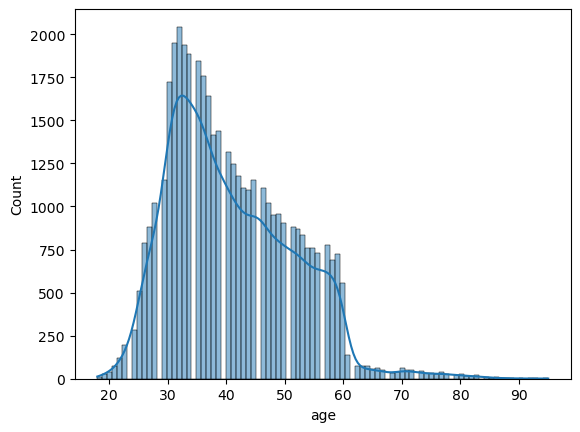

In [93]:
sns.histplot(df,x="age",kde = True);
plt.show()

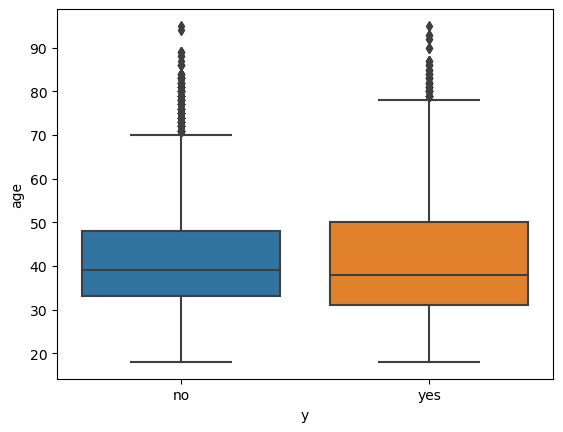

In [94]:
sns.boxplot(data=df,x='y',y='age');

Conclusion:
- From Histogram we can tell more contact has been made with people of age between 30 and 45. 
- From Box plot we concluded that People whose are in middle age(more than 47 year old) old or too young(less than 27 year old) are opted for insurance. 
- So we recommend that in the future we must target very young people and very old for insurance as they are more likely to buy the insurance

#### Job

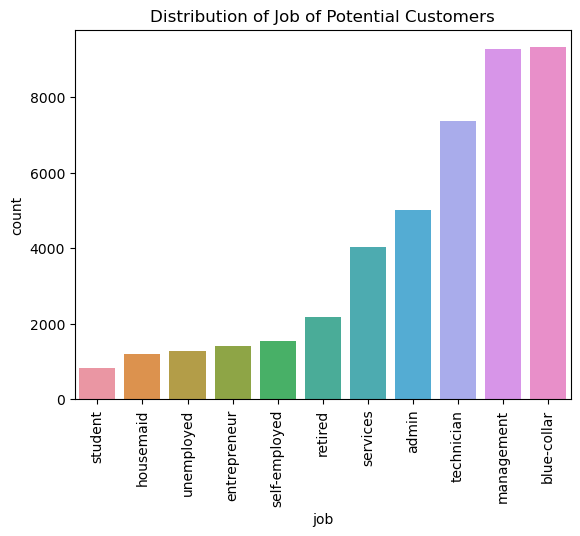

In [95]:
df01=df.groupby(["job"])["job"].count().to_frame()
df01.rename(columns={"job":'count'},inplace=True)
df01=df01.sort_values(by="count").reset_index()
ax=sns.barplot(data=df01,x="job",y="count")
ax.tick_params(axis='x',rotation=90)
ax.set_title('Distribution of Job of Potential Customers');

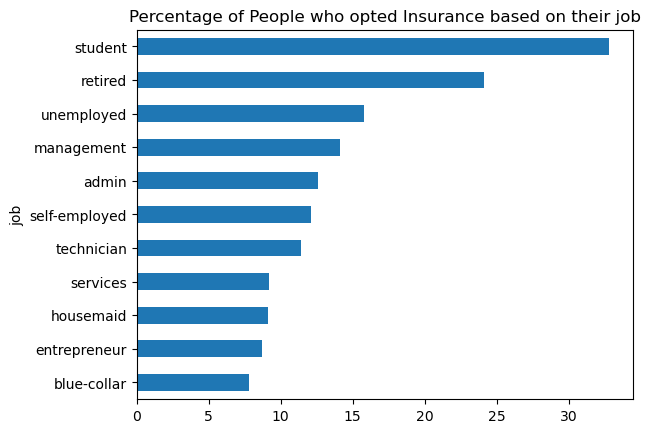

In [96]:
(df.groupby("job")['Target'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of People who opted Insurance based on their job');

Conclusion:
- From Barplot we can tell more contact has been made with people of who are blue-collor worker and people with job of management,technician,admin. less contact has been made with housemaids,umemployed people
- From 2nd plot we concluded that it's the student ,retired, unemployed , managenent who usually opt for insurance and blue-collar people least likely to opt for insurance.
- So we recommend that in the future we must not focus on blue-colloar people , should focus on retired,students.

#### marital

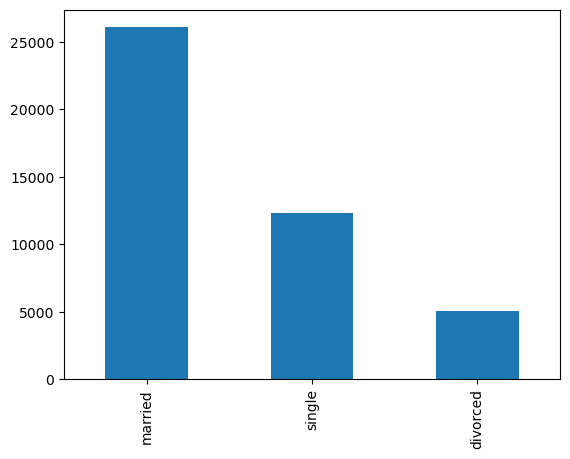

In [97]:
df['marital'].value_counts().plot(kind='bar');

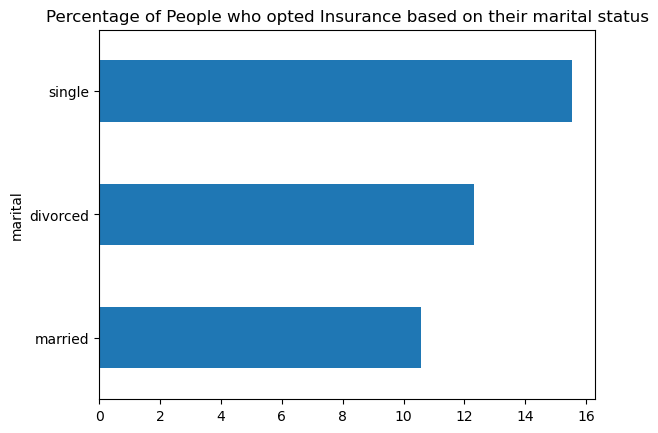

In [98]:
(df.groupby("marital")['Target'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of People who opted Insurance based on their marital status');

Conclusion:
  - we see that Single people who is most likely to opt for insurance and married people are less likely to opt for insurance (Second plot). 
  - But maximum call has been made to married people (First plot).
  - Our common general assumption that married people  will buy insurance since they might have dependency is wrong.
  - Single People opt for insurance that could be because low premium and they are most likely they buy insurance at their young age.
  - So we need to focus on people who are not married

In [99]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'Target'],
      dtype='object')

### education_qual

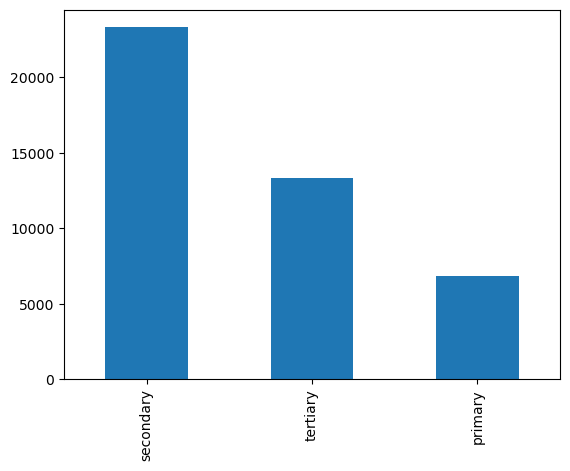

In [100]:
df['education_qual'].value_counts().plot(kind='bar');

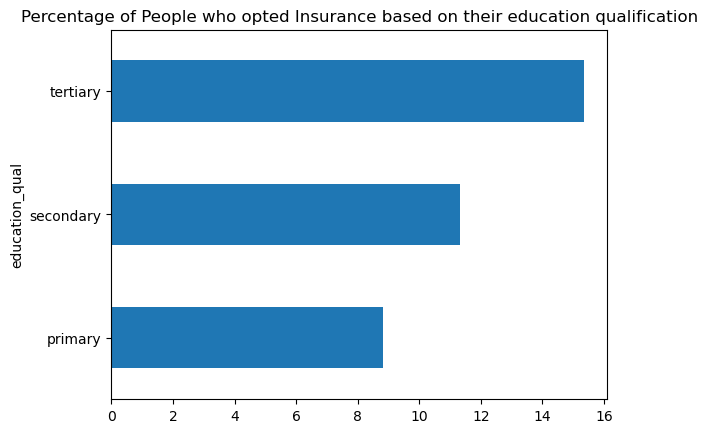

In [101]:
(df.groupby("education_qual")['Target'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of People who opted Insurance based on their education qualification');

Conclusion:

- we see that People with teritary education (highest education) who is most likely to opt for insurance and People with primary education are less likely to opt for insurance  (Second plot).
- But maximum call has been made to People with secondary education (First plot).
- Our common general assumption that People with primary education is least likely to buy insurance is right.
- People with teritary education opt for insurance that could be because of high pay job.
- So we need to focus on people People with teritary education.

### call_type

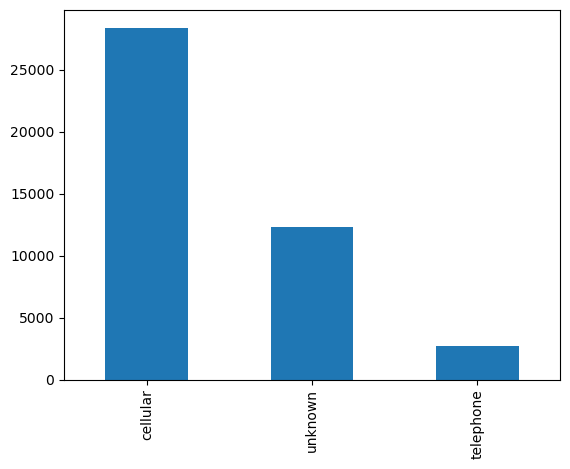

In [102]:
df['call_type'].value_counts().plot(kind='bar');

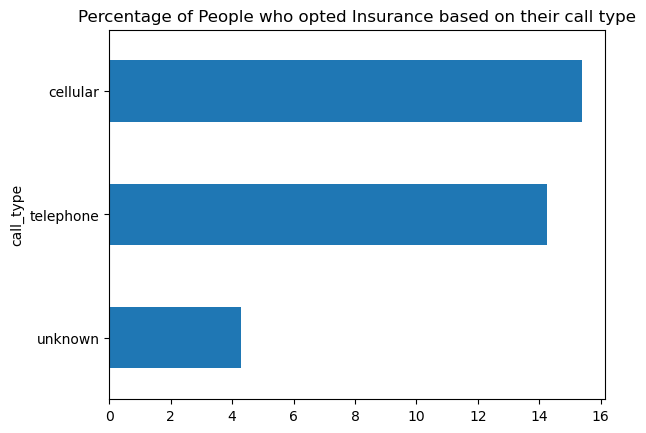

In [103]:
(df.groupby("call_type")['Target'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of People who opted Insurance based on their call type');

Conclusion:

- we see that People whom insurance company contacted on cellular and telephone almost equallaly likely to opt for insurance  (Second plot).
- But maximum call has been made on cellular (First plot).
- Our common general assumption that People whom insurance company contacted on telephone is least likely compared to people whom we contacted on cellualr buy insurance is wrong. We think people who has telephone likely stay at home and may not have active source and thus they won't buy insurance which is also wrong.
- Here we have 28% call type of people whom insurance company contacted through other means least likely to buy the insurance
- So we need not to focus on people People with unknown call type.

### mon

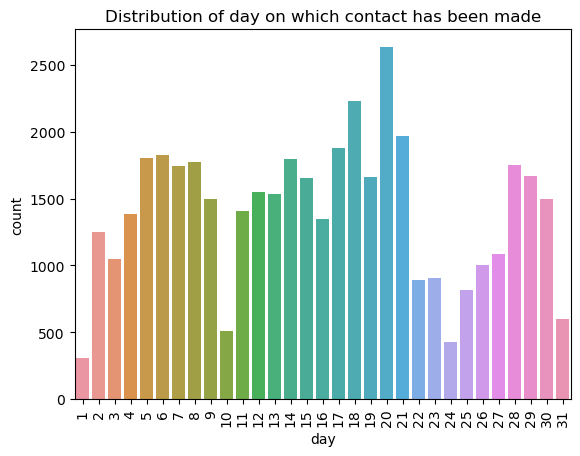

In [104]:
df01=df.groupby(["day"])["day"].count().to_frame()
df01.rename(columns={"day":'count'},inplace=True)
df01=df01.sort_values(by="day").reset_index()
ax=sns.barplot(data=df01,x="day",y="count")
ax.tick_params(axis='x',rotation=90)
ax.set_title('Distribution of day on which contact has been made');

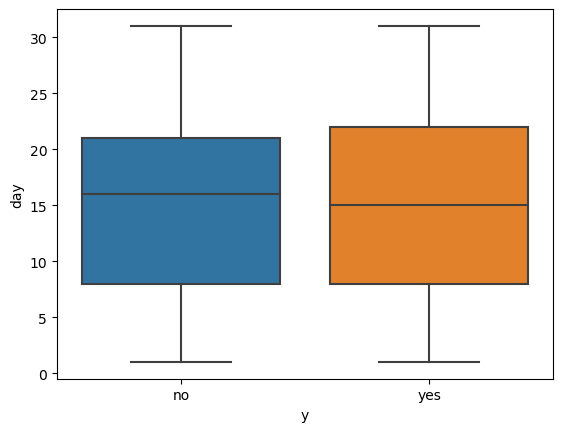

In [105]:
sns.boxplot(data=df,x='y',y='day');

### dur

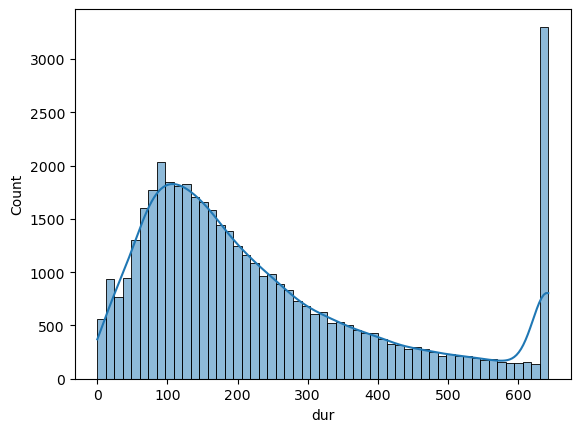

In [106]:
sns.histplot(df,x="dur",kde = True);
plt.show()

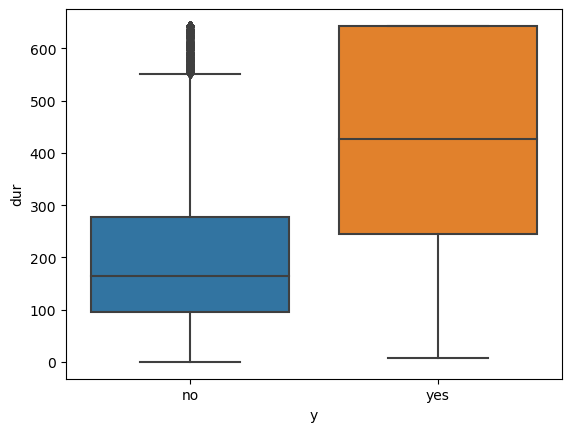

In [107]:
sns.boxplot(data=df,x='y',y='dur');

Conclusion:

- we see that when duration of call ends more than 300 seconds with potential customer, they end up buying the insurance . Call that ends less than 300 seconds ends up failure(Second plot). 
- But maximum call has duration has in between 0 and 300 seconds (First plot).
- So Insurance company should engage customer for more than 300 seconds, which will most likey results in customer buying the insurance.Short calls will not give the details of the insurance. Insurance company need to tell benefits of insurance in details which requires atleast 5 minutes.

#### num_calls

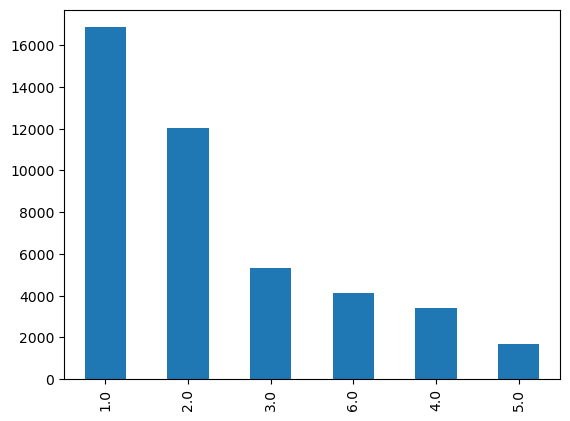

In [108]:
df['num_calls'].value_counts().plot(kind='bar');

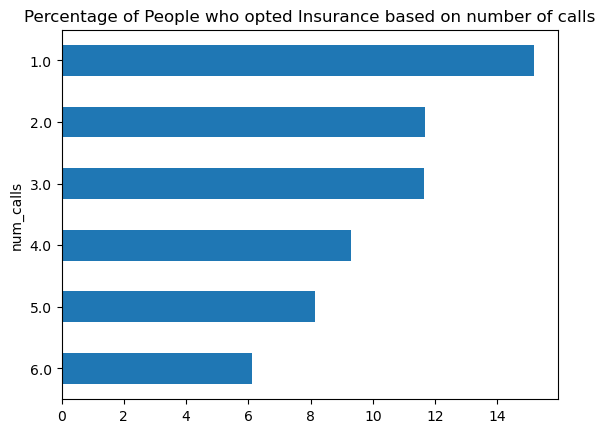

In [109]:
(df.groupby("num_calls")['Target'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of People who opted Insurance based on number of calls');

Conclusion:

- we see that least number of calls enough to convience customer to buy the insurance . more number of calls results in failure(Second plot). 
- But maximum number of calls has been less to each customer (First plot).
- So Insurance company should try to explain customer benefits of insurance in less number of calls. More calls looks like scam calls which customer always hate.

#### prev_outcome

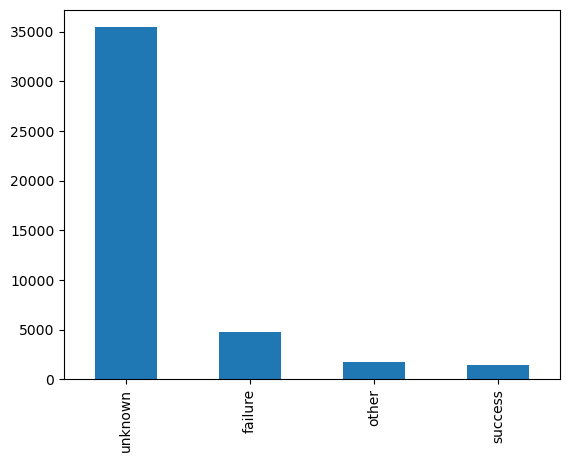

In [110]:
df['prev_outcome'].value_counts().plot(kind='bar');

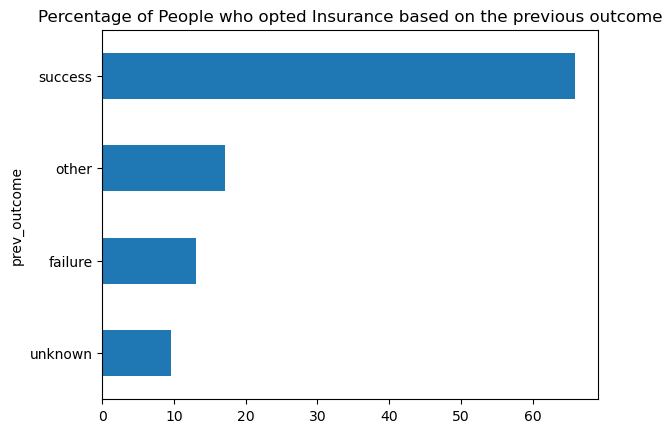

In [111]:
(df.groupby("prev_outcome")['Target'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of People who opted Insurance based on the previous outcome');

Conclusion:

- we see that people whose previous call outcome is success ends up buying the insurance(Second plot). 
- But maximum number of calls has been made to customer with previous call outcome as unknown which could be first time calling the customer(First plot).
- So Insurance company should try to to contact people whose previous call outcome is succes and then focus on other.

## Data Encoding

In [112]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0
5,35,management,married,tertiary,unknown,5,may,139.0,1.0,unknown,no,0
6,28,management,single,tertiary,unknown,5,may,217.0,1.0,unknown,no,0


In [113]:
(df.groupby("prev_outcome")['Target'].mean()*100).sort_values(ascending=False)

prev_outcome
success    65.858586
other      17.170022
failure    13.037975
unknown     9.550689
Name: Target, dtype: float64

In [114]:
df['job']=df['job'].map({'student':1,'retired':2,'unemployed':3,'management':4,'admin':5,'self-employed':6,'technician':7,'services':8,'housemaid':9,'entrepreneur':10,'blue-collar':11})
df['marital']=df['marital'].map({'single':1,'divorced':2,'married':3})
df['education_qual']=df['education_qual'].map({'tertiary':1,'secondary':2,'primary':3})
df['call_type']=df['call_type'].map({'cellular':1,'telephone':2,'unknown':3})
df['mon']=df['mon'].map({'mar':1,'sep':2,'dec':3,'oct':4,'apr':5,'feb':6,'aug':7,'jun':8,'jan':9,'nov':10,'jul':11,'may':12})
df['prev_outcome']=df['prev_outcome'].map({'success':1,'other':2,'failure':3,'unknown':4})
df.drop(columns=['y'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43445 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43445 non-null  int64  
 1   job             43445 non-null  int64  
 2   marital         43445 non-null  int64  
 3   education_qual  43445 non-null  int64  
 4   call_type       43445 non-null  int64  
 5   day             43445 non-null  int64  
 6   mon             43445 non-null  int64  
 7   dur             43445 non-null  float64
 8   num_calls       43445 non-null  float64
 9   prev_outcome    43445 non-null  int64  
 10  Target          43445 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 5.0 MB


## Data Splitting

In [140]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['Target']).values
y=df['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)

In [130]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(np.unique(y_train,return_counts=True))

(30411, 10) (13034, 10) (30411,) (13034,)
(array([0, 1], dtype=int64), array([26710,  3701], dtype=int64))


## Data Scaling

In [303]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 

scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

## Training Data Balancing

In [304]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smt.fit_resample(X_train_scaled, y_train)

In [305]:
print(X_train_balanced.shape, X_test.shape, y_train_balanced.shape, y_test.shape)
print(np.unique(y_train,return_counts=True))

(47181, 10) (13034, 10) (47181,) (13034,)
(array([0, 1], dtype=int64), array([26710,  3701], dtype=int64))


## LogisticRegression

In [306]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train_balanced,y_train_balanced) #magic happens - best values of betas - training/learning happens here

LogisticRegression()

In [307]:
y_pred=logistic_regression.predict(X_test_scaled)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [308]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[8825, 2623],
       [ 222, 1364]], dtype=int64)

In [309]:
from sklearn.metrics import roc_auc_score

lg_roc=roc_auc_score(y_test,logistic_regression.predict_proba(X_test_scaled)[:,1])
print(lg_roc)

0.8900801408727483


In [182]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'Target'],
      dtype='object')

In [210]:
coef=pd.DataFrame(logistic_regression.coef_.reshape(-1),[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome']],["Coefficients"])
coef

,Coefficients
age,0.059285
job,-0.096332
marital,-0.336749
education_qual,-0.089546
call_type,-0.794932
day,0.020912
mon,-0.319786
dur,0.014553
num_calls,-0.031857
prev_outcome,-0.569937


In [214]:
coef.reset_index(inplace=True)
coef["Coefficients"]=coef["Coefficients"].apply(lambda x:abs(x))
coef["Importnace"]=coef["Coefficients"].apply(lambda x:x/coef["Coefficients"].sum())

In [215]:
coef

,index,Features,Coefficients,Importnace
0,0,age,0.059285,0.025402
1,1,job,0.096332,0.041275
2,2,marital,0.336749,0.144287
3,3,education_qual,0.089546,0.038368
4,4,call_type,0.794932,0.340604
5,5,day,0.020912,0.008960
6,6,mon,0.319786,0.137019
7,7,dur,0.014553,0.006236
8,8,num_calls,0.031857,0.013650
9,9,prev_outcome,0.569937,0.244200


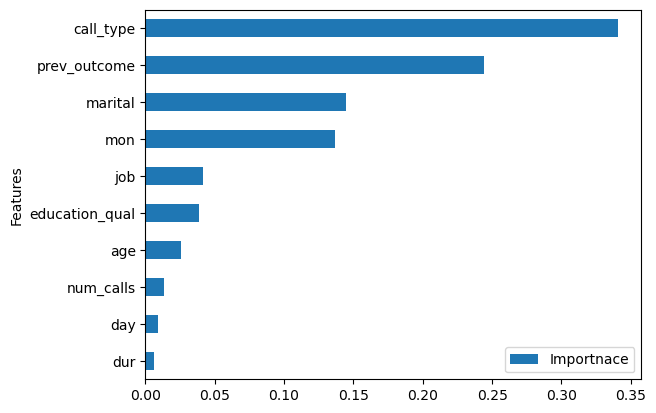

In [217]:
coef=coef.rename(columns={'level_0':'Features'})
coef.sort_values("Importnace",ascending=True,inplace=True)
coef.plot(kind='barh',y="Importnace",x="Features");

Conclusion:
- Call type,Previous outcome is very important features while predicting in Logistic Regression model

## K-NN

In [174]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler ## standrard scalig 
import warnings
warnings.filterwarnings("ignore")

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the pipeline that includes the KNN classifier and SMOTEENN
pipeline = Pipeline([
    ('smoteenn', SMOTEENN(random_state=11)),
    ('scaler', StandardScaler()),
    ('knn', knn)
])

# Define the parameter grid to search
param_grid = {'knn__n_neighbors': list(range(1,50))}

# Perform grid search using cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Print the best parameter and score
print("Best parameter:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameter: {'knn__n_neighbors': 42}
Best score: 0.8971038507797567


In [292]:
X=df.drop(columns=['Target'])
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)

scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 


from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smt.fit_resample(X_train_scaled, y_train)

In [298]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(42)
knn.fit(X_train_balanced,y_train_balanced)
knn.score(X_test_scaled,y_test)

0.7972226484578794

In [299]:
y_pred = knn.predict(X_test_scaled)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [300]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[9006, 2442],
       [ 201, 1385]], dtype=int64)

In [301]:
from sklearn.metrics import roc_auc_score

knn_roc=roc_auc_score(y_test,knn.predict_proba(X_test_scaled)[:,1])
print(knn_roc)

0.9000409659820423


## Decision Tree

In [195]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=34)

pipeline = Pipeline([
    ('smoteenn', SMOTEENN(random_state=11)),
    ('scaler', StandardScaler()),
    ('dt', dt)
])

param_grid = {'dt__max_depth': list(range(1,50))}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best parameter:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameter: {'dt__max_depth': 7}
Best score: 0.8829171107676214


In [252]:
X=df.drop(columns=['Target'])
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)

from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

In [253]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train_balanced ,y_train_balanced) 
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [254]:
from sklearn.metrics import roc_auc_score
dt_roc=roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])
print(dt_roc)

0.8945252913993249


In [255]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[9354, 2094],
       [ 251, 1335]], dtype=int64)

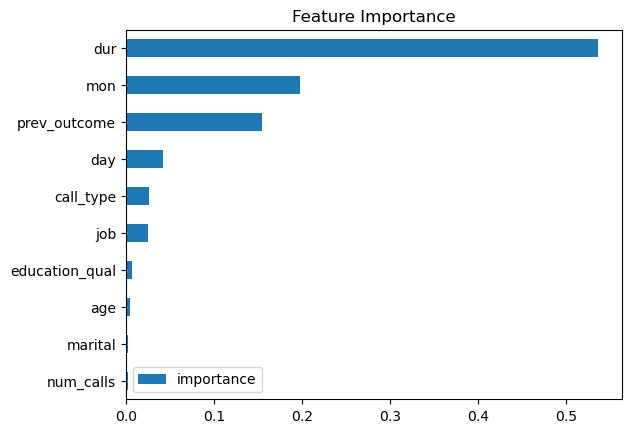

In [258]:
fi = pd.DataFrame(data=dt.feature_importances_,
             index=dt.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Conclusion:
- From Decision Tree we can say that duration of call is very important feature in determing the prediction

## Random Forest

In [259]:
X=df.drop(columns=['Target'])
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)

from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt')
rf.fit(X_train_balanced, y_train_balanced)
y_pred=rf.predict(X_test)
#print(rf.score(X_test,y_test))
print(accuracy_score(y_pred,y_test))

0.70147307043118
0.70147307043118


In [168]:
confusion_matrix(y_test,y_pred)

array([[7754, 3694],
       [ 184, 1402]], dtype=int64)

In [263]:
rf_roc=roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
print(rf_roc)

0.8643859938419944


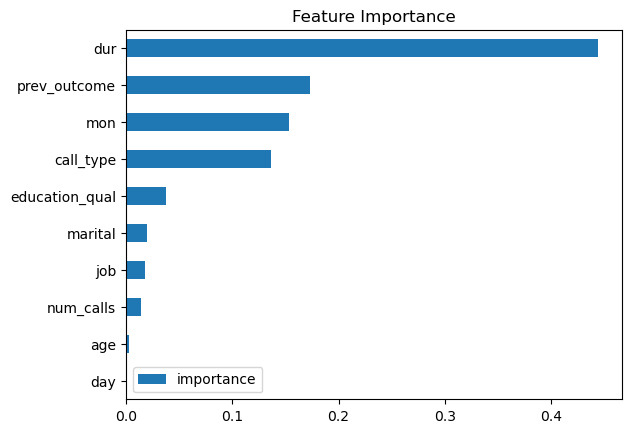

In [264]:
fi = pd.DataFrame(data=rf.feature_importances_,
             index=rf.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Conclusion:
- From Random Forest Model we can say that 'duration of call' and 'previous outcome' is very important feature in determing the prediction

## Voting Classifier

In [164]:
from sklearn.ensemble import VotingClassifier # this is the function that ensembles my model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier(3)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn',model3)], voting='soft') # it will stitich all the models together, voting = hard means max voting 

model.fit(X_train,y_train) # to train all of the models
preds = model.predict(X_test)
vc_roc=roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print(vc_roc)

0.8906012206739086


In [165]:
y_pred=model.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[11011,   437],
       [ 1003,   583]], dtype=int64)

## Bagging Classifier

In [266]:
X=df.drop(columns=['Target'])
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)


from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

In [267]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(max_depth = 7, random_state=1), n_estimators=100)
model.fit(X_train_balanced, y_train_balanced)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                        random_state=1),
                  n_estimators=100)

In [268]:
bag_roc=roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print(bag_roc)

0.8991295031737345


In [147]:
y_pred=model.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[9455, 1993],
       [ 233, 1353]], dtype=int64)

### XG Boost

In [157]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# Define the KNN classifier
#dt = DecisionTreeClassifier(random_state=34)
xgb = XGBClassifier(n_estimators=100, verbosity = 0) 


# Define the pipeline that includes the KNN classifier and SMOTEENN
pipeline = Pipeline([
    ('smoteenn', SMOTEENN(random_state=11)),
    ('xgb', xgb)
])

# Define the parameter grid to search
param_grid = {
    'xgb__learning_rate': np.arange(0.01, 1.01, 0.01)

}
#param_grid = {'knn__n_neighbors': list(range(1,5))}

# Perform grid search using cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Print the best parameter and score
print("Best parameter:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameter: {'xgb__learning_rate': 0.17}
Best score: 0.9236751124427729


In [280]:
X=df.drop(columns=['Target'])
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)

from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

In [281]:
model = XGBClassifier(learning_rate = 0.17, n_estimators=100)
model.fit(X_train_balanced,y_train_balanced) #train the model
model.score(X_test, y_test)

0.8618229246585852

In [282]:
y_pred = model.predict(X_test)

In [283]:
from sklearn.metrics import roc_auc_score
xg_roc=roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print(xg_roc)

0.92121717874695


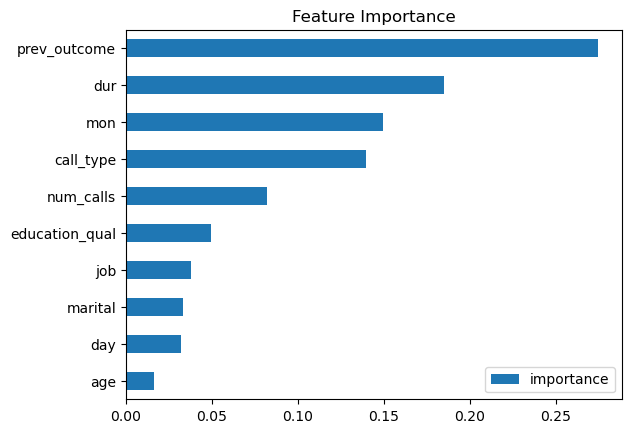

In [284]:
fi = pd.DataFrame(data=model.feature_importances_,
             index=model.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Conclusion:
- From XGBoost Model we can say that firstly 'previous outcome' and then 'duration of call' is very important feature in determing the prediction

# Summary:

In [310]:
data={'ROC_SCORE':[lg_roc,knn_roc,dt_roc,rf_roc,vc_roc,bag_roc,xg_roc]}
label=['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Voting Classifier', 'Bagging', 'XGBoost']
Final=pd.DataFrame(data,index=label)
Final

,ROC_SCORE
Logistic Regression,0.890080
KNN,0.900041
Decision Tree,0.894525
Random Forest,0.864386
Voting Classifier,0.890601
Bagging,0.899130
XGBoost,0.921217


Conclusion:
- XGBoost gives better prediction compared to other Model with ROC score of 0.92